# Exploratory data analysis

### Loading libraries

In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
# import gensim.corpora as corpora
# import gensim

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import sys
sys.path.append("../lib")


import utils

print(os.getcwd())

F:\5243\Project1\doc


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10219\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading capitalism dataset

In [2]:
df = pd.read_csv("../output/capitalism.csv",index_col=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18194 entries, 0 to 18193
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      18194 non-null  object
 1   author                     18194 non-null  object
 2   school                     18194 non-null  object
 3   sentence_spacy             18194 non-null  object
 4   sentence_str               18194 non-null  object
 5   original_publication_date  18194 non-null  int64 
 6   corpus_edition_date        18194 non-null  int64 
 7   sentence_length            18194 non-null  int64 
 8   sentence_lowered           18194 non-null  object
 9   tokenized_txt              18194 non-null  object
 10  lemmatized_str             18194 non-null  object
 11  fear                       18194 non-null  int64 
 12  anger                      18194 non-null  int64 
 13  anticipation               18194 non-null  int64 
 14  trust 

Convert *tokenized_txt* from String to list

In [3]:
df["tokenized_txt"] = list(map(lambda x:x.replace("'",'').replace(' ','')[1:-1].split(','),df["tokenized_txt"]))
stopwords = stopwords.words("english")

### Term Frequency - Inverse Document Frequency(TF-IDF)


1. Obtain TF-IDF scores of different publication of capitalism respectively, and get top 10 words
based on scores.

In [4]:
freq_table_total, freq_table_top10,freq_table_category = utils.tfidfclassifier(df,stopwords)
freq_table_top10

C:\Users\10219\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn(
C:\Users\10219\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


would       0.804583
price       0.577333
money       0.567383
capital     0.481770
value       0.473750
labour      0.441572
interest    0.410399
rate        0.407740
may         0.393895
quantity    0.387377
dtype: float64

2. Perform data visualization based on TF-IDF by word cloud

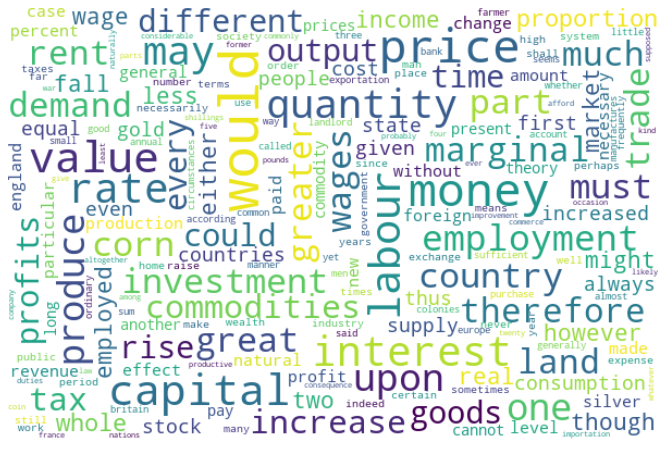

In [5]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=200,
                              width = 600, height = 400,
                              background_color="white").generate_from_frequencies(freq_table_total)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig("../figs/wordcloud_capitalism.png")
plt.show()

### Sentiment analysis
1. Calculate average number of sentiment word per word and store in a data frame

In [6]:
emotions = ["fear", "anger", "anticipation", "trust", "surprise", "positive", "negative", "sadness", "disgust",
                "joy"]
dates = df.original_publication_date.unique()
df1 = df.groupby(["original_publication_date"]).sum().iloc[:,1:].reset_index(drop=False)
for emotion in emotions:
    df1[emotion] = df1.apply(lambda x:x[emotion] / x["sentence_length"],axis=1)
df1 = df1.melt(id_vars=["original_publication_date","sentence_length"],value_vars=["positive","negative","trust","anticipation","fear"],var_name="emotion",value_name = "value")


2. Plot multi-bar chart through the history

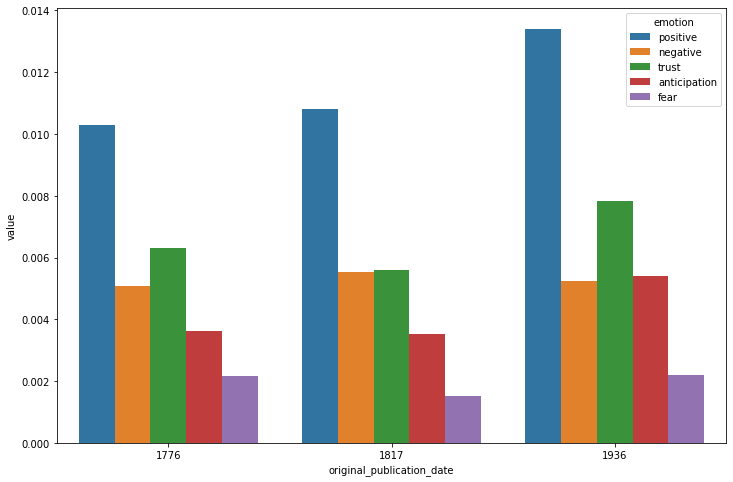

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x="original_publication_date",y="value",hue = "emotion", data=df1)
plt.savefig("../figs/era_bar.png")
plt.show()

3. Get top 10 words for each publication

In [8]:
word_freq_table = pd.DataFrame()
for date in dates:
    top10_words = freq_table_category[date].sort_values(ascending=False)[:10].index
    word_freq_table[date] = top10_words
word_freq_table

,1776,1817,1936
0,upon,would,rate
1,great,price,interest
2,part,value,money
3,would,corn,investment
4,price,labour,employment
5,country,produce,marginal
6,one,capital,output
7,greater,quantity,capital
8,much,commodities,wage
9,labour,rent,income


In [9]:
word_freq_table.to_csv("../output/word_freq_table.csv")

### Text Similarity

Even philosophy in different fields may have relationship with each other. In this part,
we want to explore whether other fields of philosophy may contribute to
the development of *capitalism*.

In [11]:
df2 = pd.read_csv("../output/similarity_data.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161475 entries, 0 to 161474
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 161475 non-null  int64 
 1   title                      161475 non-null  object
 2   author                     161475 non-null  object
 3   school                     161475 non-null  object
 4   sentence_spacy             161475 non-null  object
 5   sentence_str               161475 non-null  object
 6   original_publication_date  161475 non-null  int64 
 7   corpus_edition_date        161475 non-null  int64 
 8   sentence_length            161475 non-null  int64 
 9   sentence_lowered           161475 non-null  object
 10  tokenized_txt              161475 non-null  object
 11  lemmatized_str             161475 non-null  object
dtypes: int64(4), object(8)
memory usage: 14.8+ MB


In [12]:
df2["tokenized_txt"] = list(map(lambda x:x.replace("'",'').replace(' ','')[1:-1].split(','),df2["tokenized_txt"]))
df2_communism = df2[df2.school == "communism"]

In [13]:
dic = collections.defaultdict(list)
schools = df2.school.unique()
# titles = df2.title.unique()
for school in schools:
    df2_tmp = df2[df2.school == school]
    text = [token for txt in df2_tmp.tokenized_txt for token in txt if token not in stopwords]
    dic[school] = text


In [14]:
idx_to_word  = sorted(list(set([token for v in dic.values() for token in v ])))


In [15]:
vacabulary_length = len(idx_to_word)
len(idx_to_word), idx_to_word[222]

(57979, 'absorbing')

In [16]:
word_to_idx = {word: idx for idx, word in enumerate(idx_to_word)}
word_to_idx["absorbent"]

220

In [17]:
word_count = collections.defaultdict(np.ndarray)
for school in schools:
    text = dic[school]
    tmp = np.zeros(vacabulary_length)
    text_idx = [word_to_idx[word] for word in text]
    counter = collections.Counter(text_idx)
    for k,v in counter.items():
        tmp[k] = v
    word_count[school] = tmp

In [18]:
n = len(schools)
similarity = np.zeros(shape=(n,n))

for i in range(n):
    for j in range(n):
        school1 = schools[i]
        school2 = schools[j]
        vec1 = word_count[school1]
        vec2 = word_count[school2]
        cos_theta = np.round(np.dot(vec1,vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)),3)
        similarity[i][j] = cos_theta
cor_table = pd.DataFrame(similarity,columns=schools,index = schools)
cor_table

,empiricism,rationalism,analytic,phenomenology,german_idealism,communism,capitalism,nietzsche,feminism
empiricism,1.000,0.801,0.727,0.485,0.632,0.438,0.488,0.619,0.631
rationalism,0.801,1.000,0.684,0.493,0.635,0.413,0.434,0.680,0.602
analytic,0.727,0.684,1.000,0.559,0.658,0.428,0.441,0.583,0.505
phenomenology,0.485,0.493,0.559,1.000,0.643,0.363,0.301,0.539,0.400
german_idealism,0.632,0.635,0.658,0.643,1.000,0.451,0.400,0.591,0.474
communism,0.438,0.413,0.428,0.363,0.451,1.000,0.649,0.462,0.373
capitalism,0.488,0.434,0.441,0.301,0.400,0.649,1.000,0.440,0.417
nietzsche,0.619,0.680,0.583,0.539,0.591,0.462,0.440,1.000,0.597
feminism,0.631,0.602,0.505,0.400,0.474,0.373,0.417,0.597,1.000


In [19]:
cor_table.to_csv("../output/cor_table.csv")

### Plot heatmap for correlation coefficient matrix

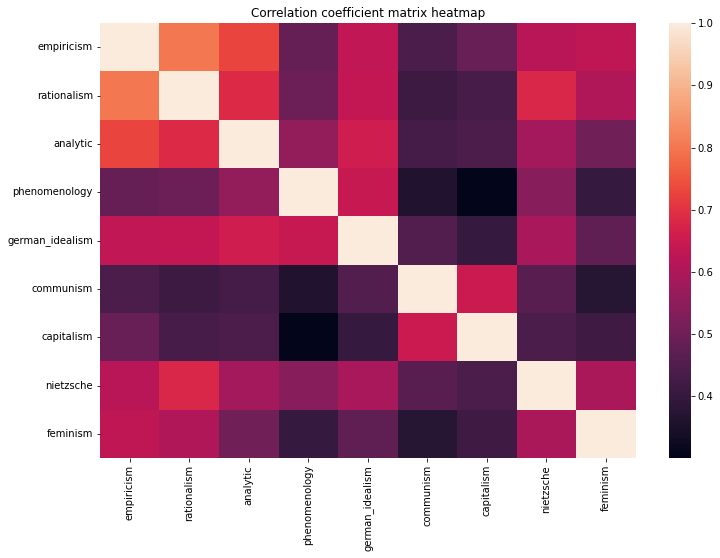

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data=cor_table)
plt.title('Correlation coefficient matrix heatmap')

plt.savefig("../figs/heatmap.png")
plt.show()

In [22]:
df2_communism = df2[df2.school == "communism"]
freq_table_total, freq_table_top10,_ = utils.tfidfclassifier(df2_communism,stopwords)
freq_table_top10

labour         0.793641
class          0.566531
one            0.534752
bourgeois      0.490027
production     0.475328
social         0.450713
capital        0.420803
state          0.403865
society        0.398034
bourgeoisie    0.388578
dtype: float64

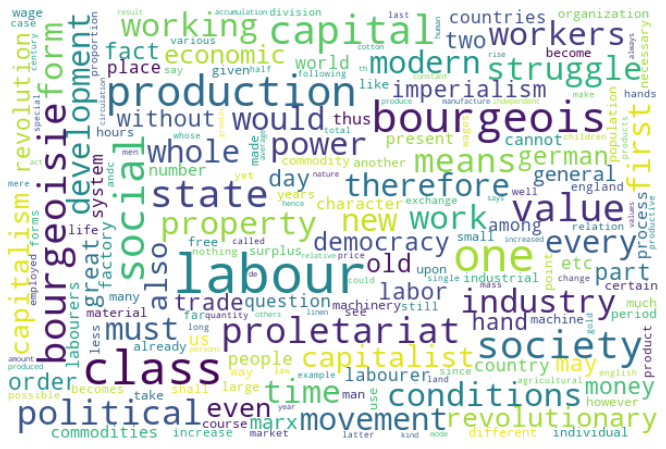

In [23]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=200,
                              width = 600, height = 400,
                              background_color="white").generate_from_frequencies(freq_table_total)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig("../figs/wordcloud_communism.png")
plt.show()

In [24]:
df2.school.unique()

array(['empiricism', 'rationalism', 'analytic', 'phenomenology',
       'german_idealism', 'communism', 'capitalism', 'nietzsche',
       'feminism'], dtype=object)